In [2]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *

/usr/local/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [3]:
# Load in the data
# File format uses 'YYYY-MM-DD-HH_Mi_Se'
df_1 = pd.read_csv('data/2015-10-11-13_47_46.csv')
start_time = datetime.datetime(2015, 10, 11, 13, 47, 46)

# df_1 = pd.read_csv('data/2015-10-11-13_53_13.csv')
start_time = datetime.datetime(2015, 10, 11, 13, 53, 13)

n = len(df_1)
print start_time
print start_time + datetime.timedelta(milliseconds=np.sum(df_1.time_diff))

2015-10-11 13:53:13
2015-10-11 13:55:52.750000


In [4]:
df_1['sample_index'] = np.arange(n)
# assume sample times
sample_time = np.mean(df_1['time_diff'])/1000

In [5]:
sample_time

0.019693047337278106

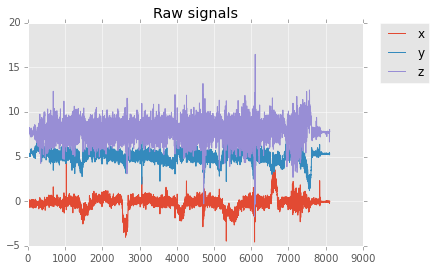

In [6]:
plt.plot(df_1['x'], label='x')
plt.plot(df_1['y'], label='y')
plt.plot(df_1['z'], label='z')
plt.title('Raw signals')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [7]:
from scipy import signal
def smooth_locally(df, col, win_size):
    # Apply a local smoothing with a windo
    win = signal.hann(win_size)
    filtered = signal.convolve(df[col], win, mode='same') / sum(win)
    filtered = filtered - np.mean(filtered)
    plt.figure()
    plt.plot(filtered)
    plt.title(col)
    return filtered
    



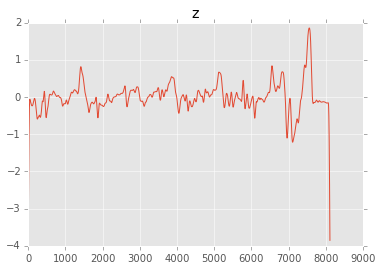

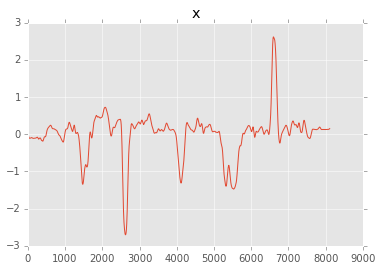

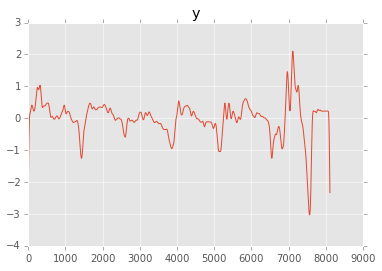

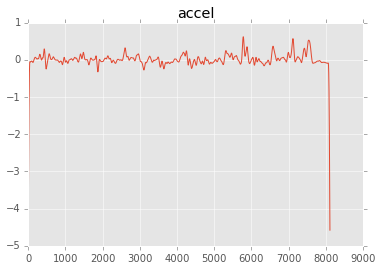

In [14]:
df_1['smooth_z'] = smooth_locally(df_1, 'z', 100)
df_1['smooth_x'] = smooth_locally(df_1, 'x', 100)
df_1['smooth_y'] = smooth_locally(df_1, 'y', 100)
df_1['accel'] = np.sqrt( np.power(df_1['y'], 2)  + 
                           np.power(df_1['z'], 2) + np.power(df_1['x'], 2) )
df_1['smooth_accel'] = smooth_locally(df_1, 'accel', 100)

In [9]:
v0 = 0 # initial velocity

In [15]:
def calcualte_speed(df, accel_col, speed_col):
    df[speed_col] = v0
    accel_l = df[accel_col].tolist()
    time_l = df['time_diff'].tolist()
    prev_speed = v0
    speeds = [0]*len(df)
    for i in xrange(len(df)):
        speed_val = prev_speed + float(time_l[i])/1000*accel_l[i]
        speeds[i] = speed_val
        prev_speed = speed_val
    df[speed_col] = np.array(speeds)
    return df
        
df_1 = calcualte_speed(df_1, 'smooth_x', 'velocity_x')
df_1 = calcualte_speed(df_1, 'smooth_y', 'velocity_y')
df_1 = calcualte_speed(df_1, 'smooth_z', 'velocity_z')
df_1 = calcualte_speed(df_1, 'smooth_accel', 'velocity')



There seems to be an error in measurement as the velocity calculated is too low.

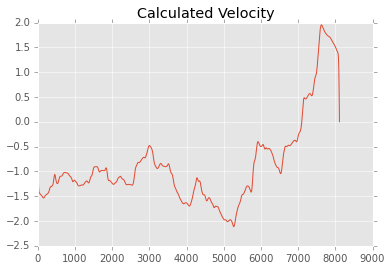

In [16]:
plt.plot(df_1[['velocity']])
plt.title('Calculated Velocity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)